In [4]:
import os
import sys
from PIL import Image
import pywt
import numpy as np
from matplotlib.pyplot import imshow
import cv2 
import math
import random
from math import log
from google.colab.patches import cv2_imshow
from tqdm import tqdm
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random', 'log']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
image_path = "/content/drive/MyDrive/Major/images/Lenna.png"
original_img = Image.open(image_path)

In [6]:
# rgba_image = Image.open(image_path)
# rgb_image = rgba_image.convert('RGB')
# temp_image=np.asarray(rgb_image)/255
# w,h,d=image.shape
# or_im=image.reshape(w*h*d)/255

In [7]:
def max_ndarray(mat):
    """
    Returns maximum value within a given 2D Matrix, otherwise 0
    Parameters
    ----------
    mat: numpy.ndarray
        matrix from which we want to compute the max value
    Returns
    -------
    int32:
        matrix maximum value
    """
    return np.amax(mat) if type(mat).__name__ == 'ndarray' else 0

In [8]:
def extract_rgb_coeff(img):
    """
    Returns RGB dwt applied coefficients tuple
    Parameters
    ----------
    img: PIL Image
    Returns
    -------
    (coeffs_r, coeffs_g, coeffs_b):
        RGB coefficients with Discrete Wavelet Transform Applied
    """
    (width, height) = img.size
    img = img.copy()

    mat_r = numpy.empty((width, height))
    mat_g = numpy.empty((width, height))
    mat_b = numpy.empty((width, height))

    for i in range(width):
        for j in range(height):
            (r, g, b) = img.getpixel((i, j))
            mat_r[i, j] = r
            mat_g[i, j] = g
            mat_b[i, j] = b

    coeffs_r = pywt.dwt2(mat_r, 'haar')
   
    coeffs_g = pywt.dwt2(mat_g, 'haar')
    
    coeffs_b = pywt.dwt2(mat_b, 'haar')
    
    return (coeffs_r, coeffs_g, coeffs_b)

In [9]:
def img_from_dwt_coeff(coeff_dwt):
    """
    Returns Image recreated from dwt coefficients
    Parameters
    ----------
    (coeffs_r, coeffs_g, coeffs_b):
        RGB coefficients with Discrete Wavelet Transform Applied
    Returns
    -------
    Image from dwt coefficients
    """
    # Channel Red
    (coeffs_r, coeffs_g, coeffs_b) = coeff_dwt

    cc = numpy.array((coeffs_r, coeffs_g, coeffs_b))

    (width, height) = (len(coeffs_r[0]), len(coeffs_r[0][0]))

    cARed = numpy.array(coeffs_r[0])
    cHRed = numpy.array(coeffs_r[1][0])
    cVRed = numpy.array(coeffs_r[1][1])
    cDRed = numpy.array(coeffs_r[1][2])
    # Channel Green
    cAGreen = numpy.array(coeffs_g[0])
    cHGreen = numpy.array(coeffs_g[1][0])
    cVGreen = numpy.array(coeffs_g[1][1])
    cDGreen = numpy.array(coeffs_g[1][2])
    # Channel Blue
    cABlue = numpy.array(coeffs_b[0])
    cHBlue = numpy.array(coeffs_b[1][0])
    cVBlue = numpy.array(coeffs_b[1][1])
    cDBlue = numpy.array(coeffs_b[1][2])

    # maxValue per channel par matrix
    cAMaxRed = max_ndarray(cARed)
    cAMaxGreen = max_ndarray(cAGreen)
    cAMaxBlue = max_ndarray(cABlue)

    cHMaxRed = max_ndarray(cHRed)
    cHMaxGreen = max_ndarray(cHGreen)
    cHMaxBlue = max_ndarray(cHBlue)

    cVMaxRed = max_ndarray(cVRed)
    cVMaxGreen = max_ndarray(cVGreen)
    cVMaxBlue = max_ndarray(cVBlue)

    cDMaxRed = max_ndarray(cDRed)
    cDMaxGreen = max_ndarray(cDGreen)
    cDMaxBlue = max_ndarray(cDBlue)

    # Image object init
    dwt_img = Image.new('RGB', (width, height), (0, 0, 20))
    # cA reconstruction

    '''
    The image formed from the low frequnecy of the images which contains the main content of the image
    '''
    for i in range(width):
        for j in range(height):
            R = cARed[i][j]
            R = (R/cAMaxRed)*100.0
            G = cAGreen[i][j]
            G = (G/cAMaxGreen)*100.0
            B = cABlue[i][j]
            B = (B/cAMaxBlue)*100.0
            new_value = (int(R), int(G), int(B))
            dwt_img.putpixel((i, j), new_value)
   
    return dwt_img

In [10]:
#calculating wavelet coefficients
coef = extract_rgb_coeff(original_img)

In [11]:
#reconstructing compressed image from obtained wavelet coefficients
dwt_image = img_from_dwt_coeff(coef)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


In [12]:
dwt_image.save('lenna_out.png')

In [13]:
# rgba_image = dwt_image
# rgb_image = rgba_image.convert('RGB')
# temp_image=np.asarray(rgb_image)/255
# w,h,d=image.shape
# comp_im=image.reshape(w*h*d)/255

In [14]:
# sum=0
# for i in range(0,or_im.size):
#   sum=sum+((or_im[i]-comp_im[i])**2)

# mse = sum/(w*h*d)*255*255

In [15]:
# psnr = 10*(math.log10((255*255)/mse))
# print(psnr)

In [16]:
oi = image_path
ci = "lenna_out.png"

In [17]:
#calculating compression ratio
ogimg = BytesIO()
original_img.save(ogimg, "png")
crimg = BytesIO()
dwt_image.save(crimg, "png")

os = ogimg.tell()
cs = crimg.tell()
cr = os/cs

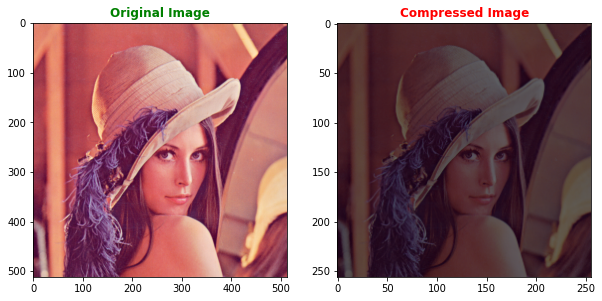

original image size
479778

compressed image size
92095

compression ratio
5.209598783864488


In [18]:
fig=plt.figure(figsize=(10, 10))

img = mpimg.imread(oi)
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image", color='green', fontweight="bold")

img = mpimg.imread(ci)
fig.add_subplot(1, 2, 2)
plt.imshow(img)
plt.title("Compressed Image", color='red', fontweight="bold")
plt.show()

print("original image size")
print(os) 
print("\ncompressed image size")
print(cs)
print("\ncompression ratio")
print(cr)

In [19]:
im = Image.open(ci)
#im = Image.open('/content/drive/MyDrive/images/compressed/mandril_out.png')
#im.save('C:/Users/Ashish/Desktop/1.png')

In [38]:
def getImageMatrix(imageName):
    im = Image.open(imageName) 
    pix = im.load()
    color = 1
    if type(pix[0,0]) == int:
      color = 0
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix,image_size[0],color

In [39]:
def getImageMatrix_gray(imageName):
    im = Image.open(imageName).convert('LA')
    pix = im.load()
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix,image_size[0]

In [21]:
#Encryption
def LogisticEncryption(imageName, key):
    N = 256
    key_list = [ord(x) for x in key]
    G = [key_list[0:4] ,key_list[4:8], key_list[8:12]]
    g = []
    R = 1
    for i in range(1,4):
        s = 0
        for j in range(1,5):
            s += G[i-1][j-1] * (10**(-j))
        g.append(s)
        R = (R*s) % 1

    L = (R + key_list[12]/256) % 1
    S_x = round(((g[0]+g[1]+g[2])*(10**4) + L *(10**4)) % 256)
    V1 = sum(key_list)
    V2 = key_list[0]
    for i in range(1,13):
        V2 = V2 ^ key_list[i]
    V = V2/V1

    L_y = (V+key_list[12]/256) % 1
    S_y = round((V+V2+L_y*10**4) % 256)
    C1_0 = S_x
    C2_0 = S_y
    C = round((L*L_y*10**4) % 256)
    C_r = round((L*L_y*10**4) % 256)
    C_g = round((L*L_y*10**4) % 256)
    C_b = round((L*L_y*10**4) % 256)
    x = 4*(S_x)*(1-S_x)
    y = 4*(S_y)*(1-S_y)
    
    imageMatrix,dimension, color = getImageMatrix(imageName)
    LogisticEncryptionIm = []
    for i in range(dimension):
        row = []
        for j in range(dimension):
            while x <0.8 and x > 0.2 :
                x = 4*x*(1-x)
            while y <0.8 and y > 0.2 :
                y = 4*y*(1-y)
            x_round = round((x*(10**4))%256)
            y_round = round((y*(10**4))%256)
            C1 = x_round ^ ((key_list[0]+x_round) % N) ^ ((C1_0 + key_list[1])%N)
            C2 = x_round ^ ((key_list[2]+y_round) % N) ^ ((C2_0 + key_list[3])%N) 
            if color:
              C_r =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][0]) % N) ^ ((C_r + key_list[7]) % N)
              C_g =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][1]) % N) ^ ((C_g + key_list[7]) % N)
              C_b =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][2]) % N) ^ ((C_b + key_list[7]) % N)
              row.append((C_r,C_g,C_b))
              C = C_r

            else:
              C = ((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j]) % N) ^ ((C + key_list[7]) % N)
              row.append(C)

            x = (x + C/256 + key_list[8]/256 + key_list[9]/256) % 1
            y = (x + C/256 + key_list[8]/256 + key_list[9]/256) % 1
            for ki in range(12):
                key_list[ki] = (key_list[ki] + key_list[12]) % 256
                key_list[12] = key_list[12] ^ key_list[ki]
        LogisticEncryptionIm.append(row)

    im = Image.new("L", (dimension, dimension))
    if color:
        im = Image.new("RGB", (dimension, dimension))
    else: 
        im = Image.new("L", (dimension, dimension)) # L is for Black and white pixels
      
    pix = im.load()
    for x in range(dimension):
        for y in range(dimension):
            pix[x, y] = LogisticEncryptionIm[x][y]
    im.save(imageName.split('.')[0] + "_LogisticEnc.png", "PNG")
    im.save("/content/drive/MyDrive/Major/images/encrypted/lenna_jpeg_LogisticEnc.png", "PNG")

In [22]:
#Decryption
def LogisticDecryption(imageName, key):
    N = 256
    key_list = [ord(x) for x in key]

    G = [key_list[0:4] ,key_list[4:8], key_list[8:12]]
    g = []
    R = 1
    for i in range(1,4):
        s = 0
        for j in range(1,5):
            s += G[i-1][j-1] * (10**(-j))
        g.append(s)
        R = (R*s) % 1
    
    L_x = (R + key_list[12]/256) % 1
    S_x = round(((g[0]+g[1]+g[2])*(10**4) + L_x *(10**4)) % 256)
    V1 = sum(key_list)
    V2 = key_list[0]
    for i in range(1,13):
        V2 = V2 ^ key_list[i]
    V = V2/V1

    L_y = (V+key_list[12]/256) % 1
    S_y = round((V+V2+L_y*10**4) % 256)
    C1_0 = S_x
    C2_0 = S_y
    
    C = round((L_x*L_y*10**4) % 256)
    I_prev = C
    I_prev_r = C
    I_prev_g = C
    I_prev_b = C
    I = C
    I_r = C
    I_g = C
    I_b = C
    x_prev = 4*(S_x)*(1-S_x)
    y_prev = 4*(L_x)*(1-S_y)
    x = x_prev
    y = y_prev
    imageMatrix, dimension, color = getImageMatrix(imageName)

    henonDecryptedImage = []
    for i in range(dimension):
        row = []
        for j in range(dimension):
            while x <0.8 and x > 0.2 :
                x = 4*x*(1-x)
            while y <0.8 and y > 0.2 :
                y = 4*y*(1-y)
            x_round = round((x*(10**4))%256)
            y_round = round((y*(10**4))%256)
            C1 = x_round ^ ((key_list[0]+x_round) % N) ^ ((C1_0 + key_list[1])%N)
            C2 = x_round ^ ((key_list[2]+y_round) % N) ^ ((C2_0 + key_list[3])%N) 
            if color:
                I_r = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_r + key_list[7]) % N) ^ imageMatrix[i][j][0]) + N-key_list[6])%N
                I_g = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_g + key_list[7]) % N) ^ imageMatrix[i][j][1]) + N-key_list[6])%N
                I_b = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_b + key_list[7]) % N) ^ imageMatrix[i][j][2]) + N-key_list[6])%N
                I_prev_r = imageMatrix[i][j][0]
                I_prev_g = imageMatrix[i][j][1]
                I_prev_b = imageMatrix[i][j][2]
                row.append((I_r,I_g,I_b))
                x = (x +  imageMatrix[i][j][0]/256 + key_list[8]/256 + key_list[9]/256) % 1
                y = (x +  imageMatrix[i][j][0]/256 + key_list[8]/256 + key_list[9]/256) % 1  
            else:
                I = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev+key_list[7]) % N) ^ imageMatrix[i][j]) + N-key_list[6])%N
                I_prev = imageMatrix[i][j]
                row.append(I)
                x = (x +  imageMatrix[i][j]/256 + key_list[8]/256 + key_list[9]/256) % 1
                y = (x +  imageMatrix[i][j]/256 + key_list[8]/256 + key_list[9]/256) % 1
            for ki in range(12):
                key_list[ki] = (key_list[ki] + key_list[12]) % 256
                key_list[12] = key_list[12] ^ key_list[ki]
        henonDecryptedImage.append(row)
    if color:
        im = Image.new("RGB", (dimension, dimension))
    else: 
        im = Image.new("L", (dimension, dimension)) # L is for Black and white pixels
    pix = im.load()
    for x in range(dimension):
        for y in range(dimension):
            pix[x, y] = henonDecryptedImage[x][y]
    im.save(imageName.split('_')[0] + "_LogisticDec.png", "PNG")
    im.save("/content/drive/MyDrive/Major/images/encrypted/lenna_jpeg_LogisticDec.png", "PNG")

In [35]:
image = "lenna_out"
ext = ".png"
key = "abcdefghijklm"

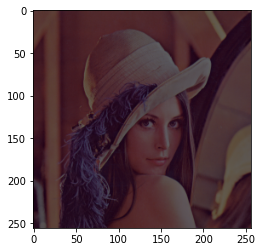

In [36]:
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im), cmap='gray')

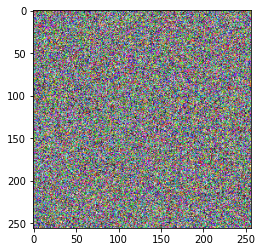

In [40]:
LogisticEncryption(image + ext, key)
im = Image.open(image + "_LogisticEnc.png", 'r')
imshow(np.asarray(im))

In [41]:
ei="/content/lenna_out_LogisticEnc.png"

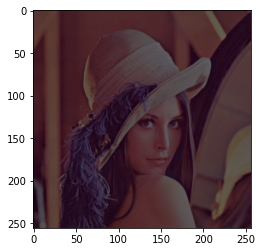

In [44]:
LogisticDecryption(image + "_LogisticEnc.png", key)
im = Image.open("/content/lenna_LogisticDec.png", 'r')
imshow(np.asarray(im))

In [45]:
# Same as NPCR both are used for sensitivity analysis two encrypted image is required



# loc1="/content/drive/MyDrive/images/encrypted/imagedecrypt.png"
# loc2="/content/drive/MyDrive/images/Lenna.png"
uloc1 = ei
uloc2 = oi
def uaci(loc1,loc2):
    image1 = Image.open(loc1)
    image2 = Image.open(loc2)
    pixel1=image1.load()
    pixel2=image2.load()
    width,height=image1.size
    value=0.0
    for y in range(0,height):
        for x in range(0,width):
            value=(abs(pixel1[x,y][0]-pixel2[x,y][0])/255)+value

    value=(value/(width*height))*100
    return value
print("UACI")
print(uaci(uloc1,uloc2))

#decrypted image and original image

UACI
33.18617876839104


In [46]:
  # It has a NPCR(Number of pixel changed rate).It compares the pixel values of the original image and the encrypted image.
  # The resultant value is returned in percentage.If the value is more than 99% then the analysis is positive.
    
   # It consist of three modules rateofchange(),sumofpixel(),npcrv().


 #   This method compares two image.If the pixel value is same then 0 is stored in the matrix else one is stored
# loc1="/content/drive/MyDrive/images/encrypted/imagedecrypt.png"
# loc2="/content/drive/MyDrive/images/Lenna.png"
loc1 = ei
loc2 = oi
def rateofchange(height,width,pixel1,pixel2,matrix,i):

    for y in range(0,height):
        for x in range(0,width):
            #print(x,y)
            if pixel1[x,y][i] == pixel2[x,y][i]:
                matrix[x,y]=0
            else:
                matrix[x,y]=1
    return matrix
"""
    sum of the values of 1 stored in matrix is calculated
"""
def sumofpixel(height,width,pixel1,pixel2,ematrix,i):
    matrix=rateofchange(height,width,pixel1,pixel2,ematrix,i)
    psum=0
    for y in range(0,height):
        for x in range(0,width):
            psum=matrix[x,y]+psum
    return psum

"""
Finally the above two module is called to calculate the values
"""
def npcrv(loc1,loc2):
    c1 = Image.open(loc1)
    c2 = Image.open(loc2)
    width, height = c1.size
    pixel1 = c1.load()
    pixel2 = c2.load()
    ematrix = np.empty([width, height])
    per=(((sumofpixel(height,width,pixel1,pixel2,ematrix,0)/(height*width))*100)+((sumofpixel(height,width,pixel1,pixel2,ematrix,1)/(height*width))*100)+((sumofpixel(height,width,pixel1,pixel2,ematrix,2)/(height*width))*100))/3
    return per
print("NPCR")
print(npcrv(loc1,loc2))

NPCR
99.62972005208333


In [47]:
#calculating size of encrypted and decrypted files
encrypted_img = Image.open(ei)
decrypted_img = Image.open(ci)
enimg = BytesIO()
encrypted_img.save(enimg, "png")
deimg = BytesIO()
decrypted_img.save(deimg, "png")
es = enimg.tell()
ds = deimg.tell()

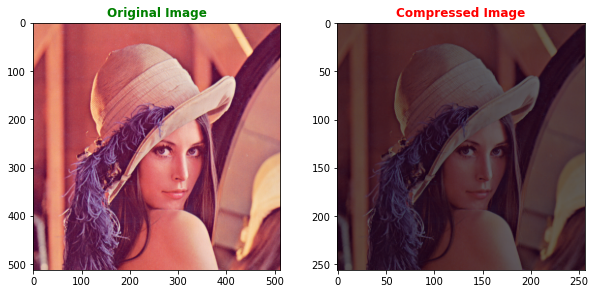

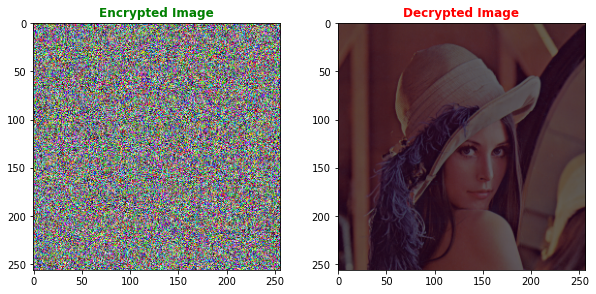

original image size
479778

compressed image size
92095

encrypted image size
197174

decrypted image size
92095

compression ratio
5.209598783864488

UACI
33.18617876839104

NPCR
99.62972005208333


In [48]:
fig=plt.figure(figsize=(10, 10))

img = mpimg.imread(oi)
fig.add_subplot(2, 2, 1)
plt.imshow(img)
plt.title("Original Image", color='green', fontweight="bold")

img = mpimg.imread(ci)
fig.add_subplot(2, 2, 2)
plt.imshow(img)
plt.title("Compressed Image", color='red', fontweight="bold")
plt.show()

fig=plt.figure(figsize=(10, 10))

img = mpimg.imread(ei)
fig.add_subplot(2, 2, 3)
plt.imshow(img)
plt.title("Encrypted Image", color='green', fontweight="bold")

img = mpimg.imread(ci)
fig.add_subplot(2, 2, 4)
plt.imshow(img)
plt.title("Decrypted Image", color='red', fontweight="bold")
plt.show()

print("original image size")
print(os) 
print("\ncompressed image size")
print(cs)
print("\nencrypted image size")
print(es) 
print("\ndecrypted image size")
print(ds)
print("\ncompression ratio")
print(cr)
print("\nUACI")
print(uaci(uloc1,uloc2))
print("\nNPCR")
print(npcrv(loc1,loc2))